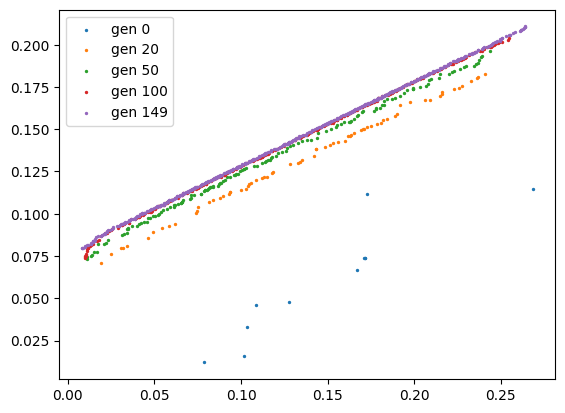

In [13]:
from matplotlib import pyplot as plt
import pickle
import numpy as np

run = '01'
def print_pop():
    gens = [0, 20, 50, 100, 149]
    fig, ax = plt.subplots()
    for gen in gens:        
        with open(f"data/runs/{run}/checkpoint_name_gen_{gen}.pkl", "rb") as cp_file:
            cp = pickle.load(cp_file)
            population = cp["population"]
            pareto = cp["pareto"]
            front = np.array([ind.fitness.values for ind in pareto]) #if ind.fitness.values[0] <= 0.02 and ind.fitness.values[1] >= 0.9])
            ax.scatter(front[:,0], front[:,1], s=2, label=f"gen {gen}")
    ax.legend()
    plt.show()

print_pop()

Final population hypervolume is 123.211423


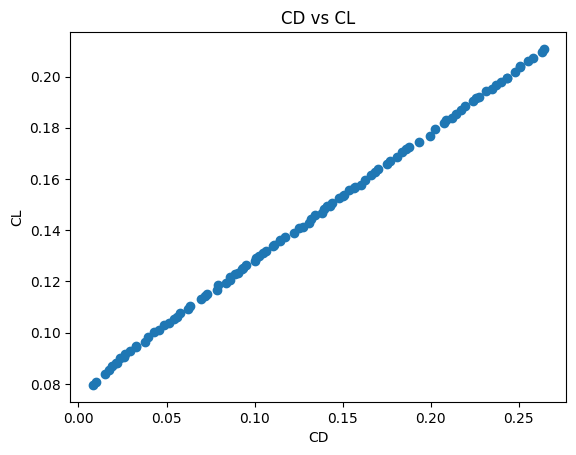

In [14]:

import matplotlib.pyplot as plt
import numpy
from nsga2 import main
gen = 149
population, stats = main(checkpoint=f'data/runs/{run}/checkpoint_name_gen_{gen}.pkl', max_gen=gen-1)
front = numpy.array([ind.fitness.values for ind in population])
# optimal_front = numpy.array(optimal_front)
# plt.scatter(optimal_front[:,0], optimal_front[:,1], c="r")
cd = front[:, 0]
cl = front[:, 1]
fig, ax = plt.subplots()
ax.scatter(cd, cl)
ax.set_xlabel("CD")
ax.set_ylabel("CL")
ax.set_title("CD vs CL")
plt.show()

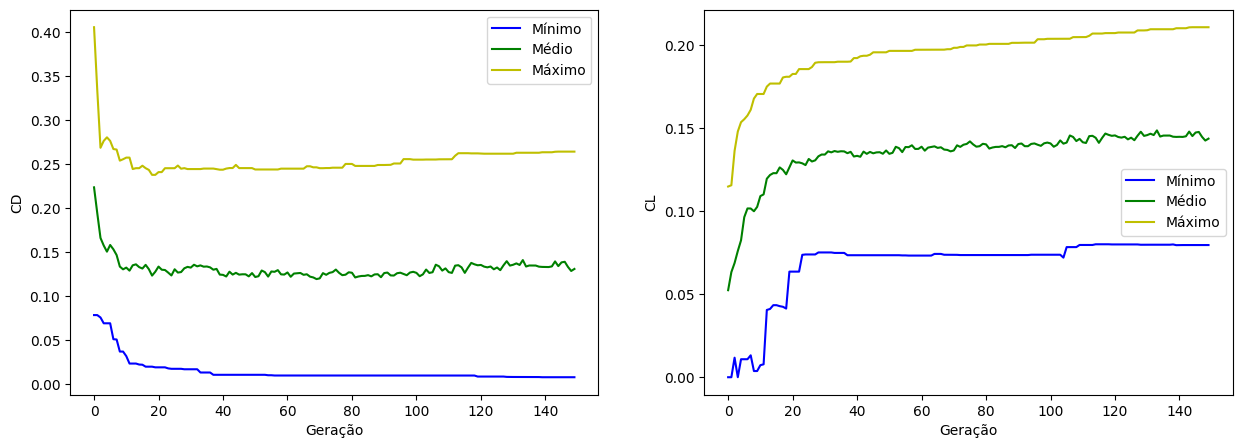

In [15]:
gen = stats.select("gen")
fit_avgs = stats.select("avg")
fit_mins = stats.select("min")
fit_maxes = stats.select("max")

cl_fits_avgs = [fit_avg[0] for fit_avg in fit_avgs]
cd_fits_avgs = [fit_avg[1] for fit_avg in fit_avgs]

cl_fits_mins = [fit_min[0] for fit_min in fit_mins]
cd_fits_mins = [fit_min[1] for fit_min in fit_mins]

cl_fits_maxes = [fit_max[0] for fit_max in fit_maxes]
cd_fits_maxes = [fit_max[1] for fit_max in fit_maxes]

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax1 = axs[0]
ax2 = axs[1]
line1 = ax1.plot(gen, cl_fits_mins, "b-", label="Mínimo")
line21 = ax2.plot(gen, cd_fits_mins, "b-", label="Mínimo")
ax1.set_xlabel("Geração")
ax1.set_ylabel("CD")
ax2.set_xlabel("Geração")
ax2.set_ylabel("CL")

# for tl in ax1.get_yticklabels():
#     tl.set_color("b")

# ax2 = ax1.twinx()
# line2 = ax2.plot(gen, size_avgs, "r-", label="Average Size")
# ax2.set_ylabel("Size", color="r")
# for tl in ax2.get_yticklabels():
#     tl.set_color("r")

line2 = ax1.plot(gen, cl_fits_avgs, "g-", label="Médio")
line22 = ax2.plot(gen, cd_fits_avgs, "g-", label="Médio")

line3 = ax1.plot(gen, cl_fits_maxes, "y-", label="Máximo")
line23 = ax2.plot(gen, cd_fits_maxes, "y-", label="Máximo")

lns = line1 + line2 + line3
lns2 = line21 + line22 + line23
labs = [l.get_label() for l in lns]
labs2 = [l.get_label() for l in lns2]
ax1.legend(lns, labs, loc="upper right")
ax2.legend(lns2, labs2, loc="center right")

plt.show()

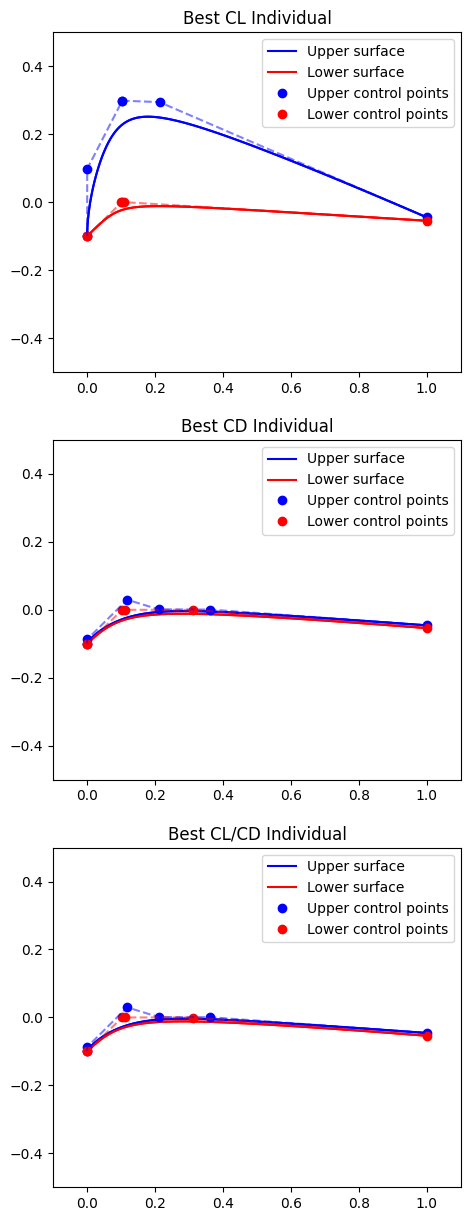

In [16]:
from utils.bezier_parametrization import BezierAirfoil
control_points_shape = (6, 6)
with open('data/runs/01/checkpoint_name_gen_149.pkl', 'rb'):
    cp = pickle.load(open(f'data/runs/{run}/checkpoint_name_gen_149.pkl', 'rb'))
    population = cp["population"]
    # pareto = cp["pareto"]
    best_cl_individuals = cp['best_cl_individuals']
    best_cd_individuals = cp['best_cd_individuals']
    best_cl_o_cd_individuals = cp['best_cl_o_cd_individuals']
    # front = [ind for ind in pareto] # if ind.fitness.values[0] <= 0.02 and ind.fitness.values[1] >= 0.9]
                     
best_cl_individual = best_cl_individuals[-1]
best_cd_individual = best_cd_individuals[-1]
best_cl_o_cd_individual = best_cl_o_cd_individuals[-1]

best_cl_airfoil = BezierAirfoil(best_cl_individual, shape=control_points_shape)
best_cd_airfoil = BezierAirfoil(best_cd_individual, shape=control_points_shape)
best_cl_o_cd_airfoil = BezierAirfoil(best_cl_o_cd_individual, shape=control_points_shape)

fig, axs = plt.subplots(3, 1, figsize=(15, 15))
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
best_cl_airfoil.plot(ax1)
best_cd_airfoil.plot(ax2)
best_cl_o_cd_airfoil.plot(ax3)
ax1.set_title("Best CL Individual")
ax2.set_title("Best CD Individual")
ax3.set_title("Best CL/CD Individual")
plt.show()

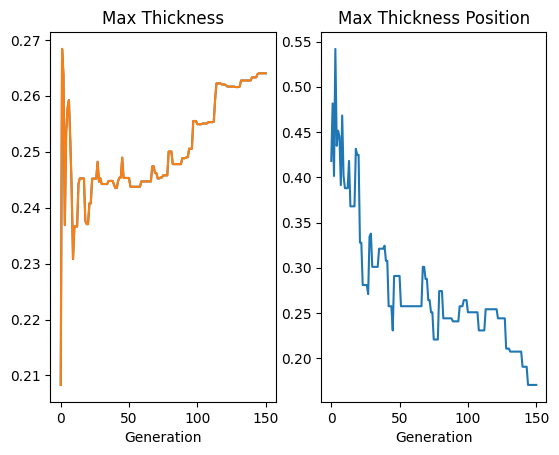

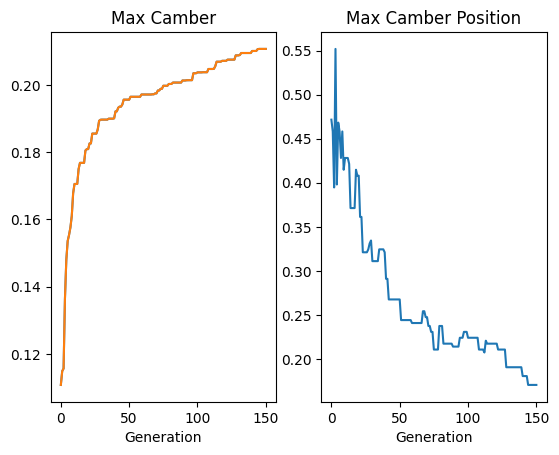

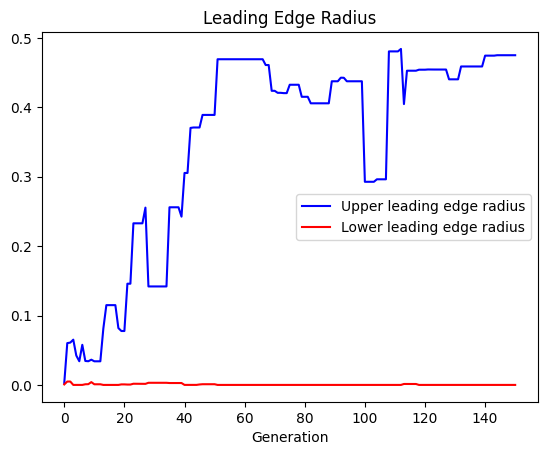

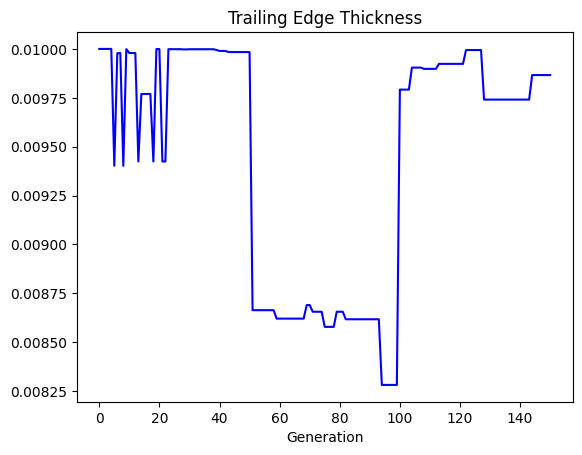

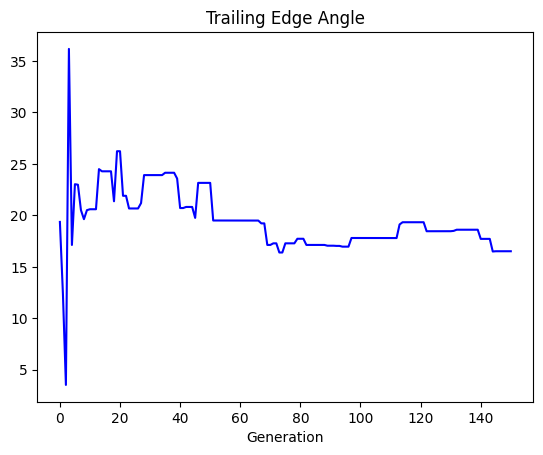

In [17]:
from utils.bezier_parametrization import BezierAirfoil
control_points_shape = (6, 6)
with open('data/runs/01/checkpoint_name_gen_149.pkl', 'rb'):
    cp = pickle.load(open(f'data/runs/{run}/checkpoint_name_gen_149.pkl', 'rb'))
    population = cp["population"]
    # pareto = cp["pareto"]
    best_cl_individuals = cp['best_cl_individuals']
    best_cd_individuals = cp['best_cd_individuals']
    best_cl_o_cd_individuals = cp['best_cl_o_cd_individuals']
    # front = [ind for ind in pareto] # if ind.fitness.values[0] <= 0.02 and ind.fitness.values[1] >= 0.9]

# Plotting relevant info for each generation
# max thickness and thickness position
# max camber and camber position
# leading edge radius
# trailing edge thickness
# trailing edge angle

def plot_thickness_and_position(individuals):
    airfoils = [BezierAirfoil(individual, shape=control_points_shape) for individual in individuals]
    infos = [airfoil.get_general_info() for airfoil in airfoils]
    thicknesses = [info['thickness']['max_value'] for info in infos]
    generations = range(len(airfoils))
    thickness_positions = [info['thickness']['max_location'] for info in infos]
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(generations, thicknesses, thicknesses, '-')
    axs[1].plot(generations, thickness_positions, '-')
    axs[0].set_title('Max Thickness')
    axs[1].set_title('Max Thickness Position')
    axs[0].set_xlabel('Generation')
    axs[1].set_xlabel('Generation')
    plt.show()    

def plot_camber_and_position(individuals):
    airfoils = [BezierAirfoil(individual, shape=control_points_shape) for individual in individuals]
    infos = [airfoil.get_general_info() for airfoil in airfoils]
    cambers = [info['camber']['max_value'] for info in infos]
    generations = range(len(airfoils))
    camber_positions = [info['camber']['max_location'] for info in infos]
    fig, axs = plt.subplots(1, 2)
    axs[0].plot(generations, cambers, cambers, '-')
    axs[1].plot(generations, camber_positions, '-')
    axs[0].set_title('Max Camber')
    axs[1].set_title('Max Camber Position')
    axs[0].set_xlabel('Generation')
    axs[1].set_xlabel('Generation')
    plt.show()

def plot_leading_edge_radius(individuals):
    airfoils = [BezierAirfoil(individual, shape=control_points_shape) for individual in individuals]
    infos = [airfoil.get_general_info() for airfoil in airfoils]
    upper_leading_edge_radius = [abs(1/info['upper']['curvature']) for info in infos]
    lower_leading_edge_radius = [abs(1/info['lower']['curvature']) for info in infos]
    generations = range(len(airfoils))
    fig, ax = plt.subplots()
    ax.plot(generations, upper_leading_edge_radius, '-b', label='Upper leading edge radius')
    ax.plot(generations, lower_leading_edge_radius, '-r', label='Lower leading edge radius')
    ax.set_title('Leading Edge Radius')
    ax.set_xlabel('Generation')
    ax.legend()
    plt.show()

def plot_trailing_edge_thickness(individuals):
    airfoils = [BezierAirfoil(individual, shape=control_points_shape) for individual in individuals]
    infos = [airfoil.get_general_info() for airfoil in airfoils]
    trailing_edge_thickness = [info['thickness']['trailing_edge_thickness'] for info in infos]
    generations = range(len(airfoils))
    fig, ax = plt.subplots()
    ax.plot(generations, trailing_edge_thickness, '-b', label='Trailing edge thickness')
    ax.set_title('Trailing Edge Thickness')
    ax.set_xlabel('Generation')
    plt.show()

def plot_trailing_edge_angle(individuals):
    airfoils = [BezierAirfoil(individual, shape=control_points_shape) for individual in individuals]
    infos = [airfoil.get_general_info() for airfoil in airfoils]
    trailing_edge_angle = [info['camber']['alpha_te'] for info in infos]
    generations = range(len(airfoils))
    fig, ax = plt.subplots()
    ax.plot(generations, trailing_edge_angle, '-b', label='Trailing edge angle')
    ax.set_title('Trailing Edge Angle')
    ax.set_xlabel('Generation')
    plt.show()

plot_thickness_and_position(best_cl_individuals)
plot_camber_and_position(best_cl_individuals)
plot_leading_edge_radius(best_cl_individuals)
plot_trailing_edge_thickness(best_cl_individuals)
plot_trailing_edge_angle(best_cl_individuals)

In [18]:
# from pprint import pprint
# from utils.xfoil_adapter import XFoilAdapter


# with XFoilAdapter(timeout=12) as xfoil:
#     airfoils = [best_cl_airfoil, best_cd_airfoil, best_cl_o_cd_airfoil]
#     xfoil.set_airfoils(airfoils=airfoils)
#     xfoil.set_run_condition(
#         reynolds=3e6,
#         mach=0,
#         alphas=[8],
#     )
#     results = xfoil.run()

# pprint(results)

In [19]:
from utils.save_coordinates_to_dat_file import save_coordinates_to_dat_file

with open("data/best_cl_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cl_airfoil.get_coordinates())
with open("data/best_cd_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cd_airfoil.get_coordinates())
with open("data/best_cl_o_cd_airfoil.dat", "wt") as f:
    save_coordinates_to_dat_file(f, best_cl_o_cd_airfoil.get_coordinates())